
# Probability Distributions Assignment - Group 11

This notebook contains implementations for:
1. **Exponential Distribution**: Modeling time between events in a Poisson process.
2. **Bayesian Probability**: Applying Bayes' Theorem to a real-world problem.
3. **Gradient Descent**: Implementing gradient descent for linear regression.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Part 1: Exponential Distribution - Inter-Arrival times

**A real-world example** using the **Exponential Distribution**.

#### Scenario:
A large cloud computing company manages a data center where servers receive incoming network packets. The arrival of these packets follows an Exponential distribution due to the following reasons:

- Packets arrive **randomly and independently**.
- The **rate of incoming packets** remains constant over time.

#### Problem Statement

- The average packet arrival rate is **500 packets per second**.
- The task is to simulate and visualize the distribution of **inter-arrival times** (time between consecutive packets).
- We aim to check if the **empirical data** (simulated values) matches the **theoretical Exponential distribution**.


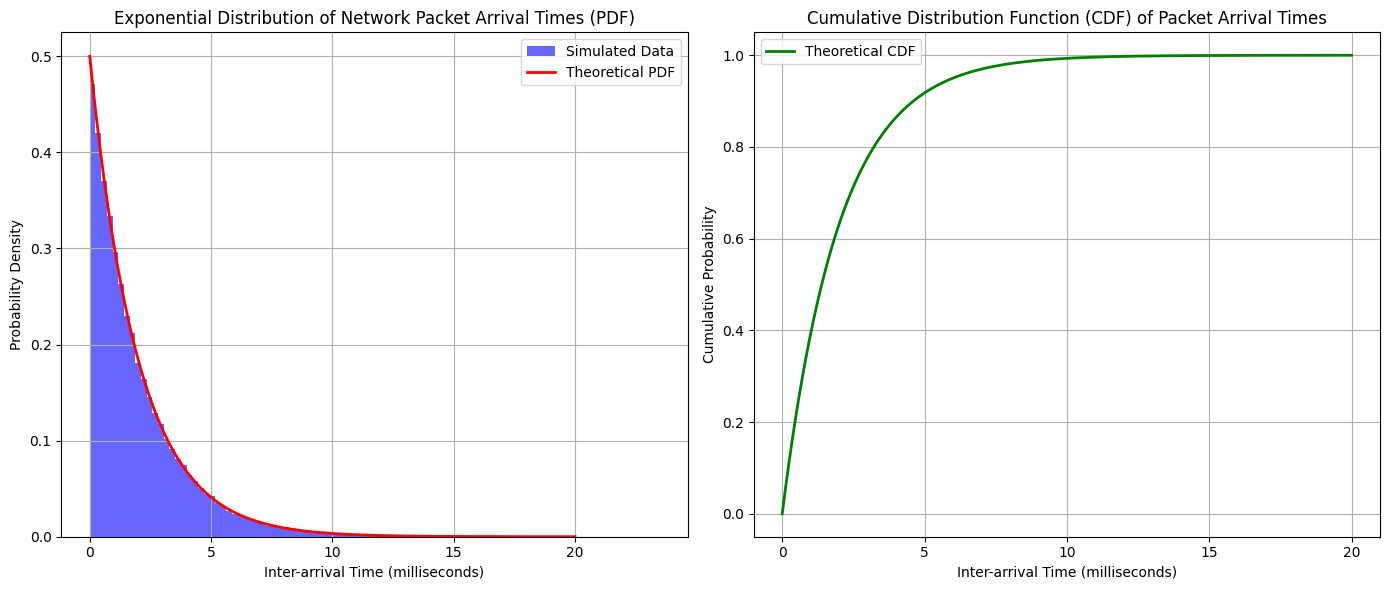

In [26]:
# Define the arrival rate (packets per second)
lambda_rate = 500  # 500 packets per second

# Simulate inter-arrival times using NumPy's exponential distribution
num_samples = 100000  # Large dataset to see smooth distribution
inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=num_samples) * 1000  # Convert to milliseconds

# Generate theoretical Exponential PDF
x_values = np.linspace(0, 20, 1000)  # Time range (0 to 20 ms) with smooth intervals
pdf_values = (lambda_rate / 1000) * np.exp(-lambda_rate * x_values / 1000)  # PDF formula adjusted for milliseconds

# Generate theoretical Exponential CDF
cdf_values = 1 - np.exp(-lambda_rate * x_values / 1000)  # CDF formula

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram and PDF on the first subplot
axes[0].hist(inter_arrival_times, bins=100, density=True, alpha=0.6, color='b', label='Simulated Data')
axes[0].plot(x_values, pdf_values, 'r-', label='Theoretical PDF', linewidth=2)
axes[0].set_xlabel("Inter-arrival Time (milliseconds)")
axes[0].set_ylabel("Probability Density")
axes[0].set_title("Exponential Distribution of Network Packet Arrival Times (PDF)")
axes[0].legend()
axes[0].grid(True)

# Plot only the CDF on the second subplot
axes[1].plot(x_values, cdf_values, 'g-', label='Theoretical CDF', linewidth=2)
axes[1].set_xlabel("Inter-arrival Time (milliseconds)")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Cumulative Distribution Function (CDF) of Packet Arrival Times")
axes[1].legend()
axes[1].grid(True)

# Adjust x-axis ticks for both plots
for ax in axes:
    ax.set_xticks(np.arange(0, 21, 5))

# Show the plots
plt.tight_layout()
plt.show()


## Part 2: Bayesian Probability - Diagnosing a Disease

###Real World Example:

A certain disease affects 1% of the population. A medical test is available to detect the disease, but it is not perfect:

If a person has the disease, the test correctly returns positive 95% of the time.
If a person does not have the disease, the test incorrectly returns positive 5% of the time.
You take the test and receive a positive result.

Question:
What is the actual probability that you have the disease, given that you tested positive? (Use Bayes' Theorem to calculate the answer.)

**Below is the Implementation of Solution usng Bayes' Theorem:**

In [27]:

# Given probabilities
P_D = 0.01  # Prior: 1% of people have the disease
P_T_given_D = 0.95  # Likelihood: Test detects the disease 95% of the time
P_not_D = 1 - P_D  # Probability of being healthy
P_T_given_not_D = 0.05  # False positive rate: 5% of healthy people test positive

#Step 1: Compute the total probability of testing positive
P_T_sick = P_T_given_D * P_D # Probability of testing positive AND having the disease
P_T_healthy = P_T_given_not_D * P_not_D # Probability of testing positive AND being healthy
P_T = P_T_sick + P_T_healthy # Total probability of a positive test


# Display intermediate calculations
print(f"Probability of testing positive given you are sick (P_T_given_D * P_D): {P_T_sick:.4f}")
print(f"Probability of testing positive given you are healthy (P_T_given_not_D * P_not_D): {P_T_healthy:.4f}")
print(f"Total probability of testing positive (P_T): {P_T:.4f}\n")

# Step 2: Compute the probability of actually having the disease given a positive test
P_D_given_T = (P_T_given_D * P_D) / P_T  # Bayes' Theorem

# Display result
print(f"If you test positive, the probability that you actually have the disease is: {P_D_given_T:.2%}")


Probability of testing positive given you are sick (P_T_given_D * P_D): 0.0095
Probability of testing positive given you are healthy (P_T_given_not_D * P_not_D): 0.0495
Total probability of testing positive (P_T): 0.0590

If you test positive, the probability that you actually have the disease is: 16.10%



## Part 3: Gradient Descent in Code: A Simple Model

### What's Happening Here?

The code performs linear regression using the BFGS optimization algorithm to minimize the Mean Squared Error (MSE) loss function. It starts with initial values for the slope (m) and intercept (b), then iteratively updates them to find the best-fit line. A callback function tracks parameter changes during optimization.

The optimization stops when the gradient tolerance (tol=1e-6) is met, meaning further changes in the parameters are negligible, indicating convergence. Finally, the optimized parameters are used to make predictions and visualize both the parameter evolution and the best-fit line.

Below are manual calculation for our simple model and below it show cases our Implementation of the Gradient Descent and prediction of the model.

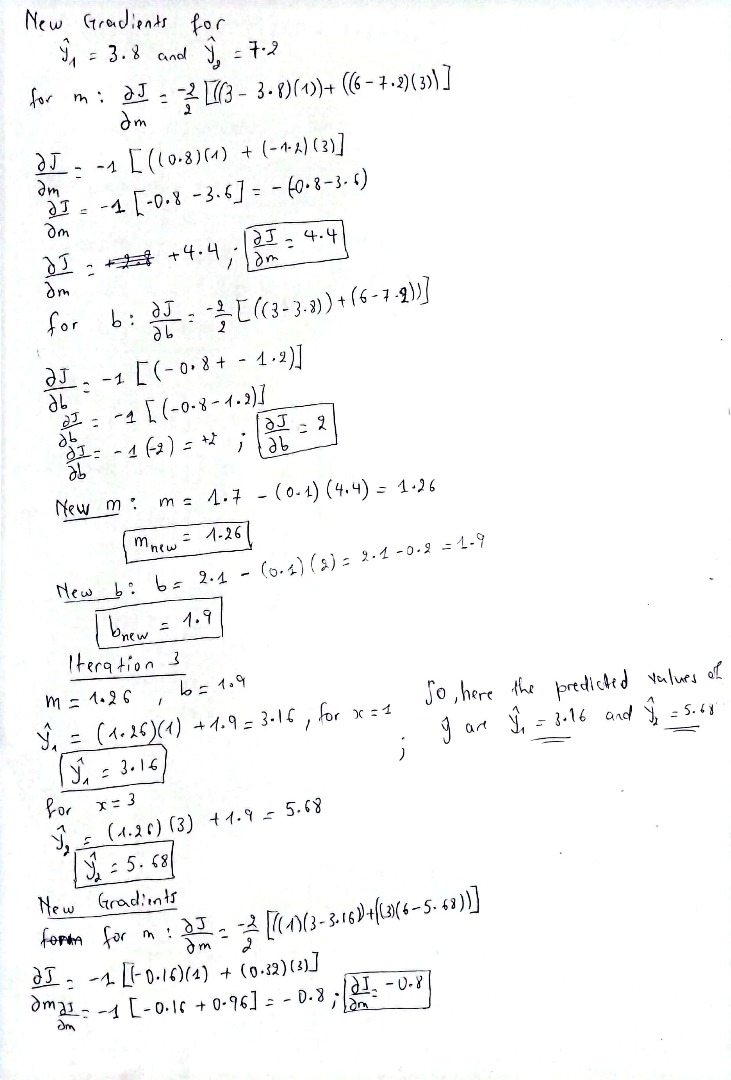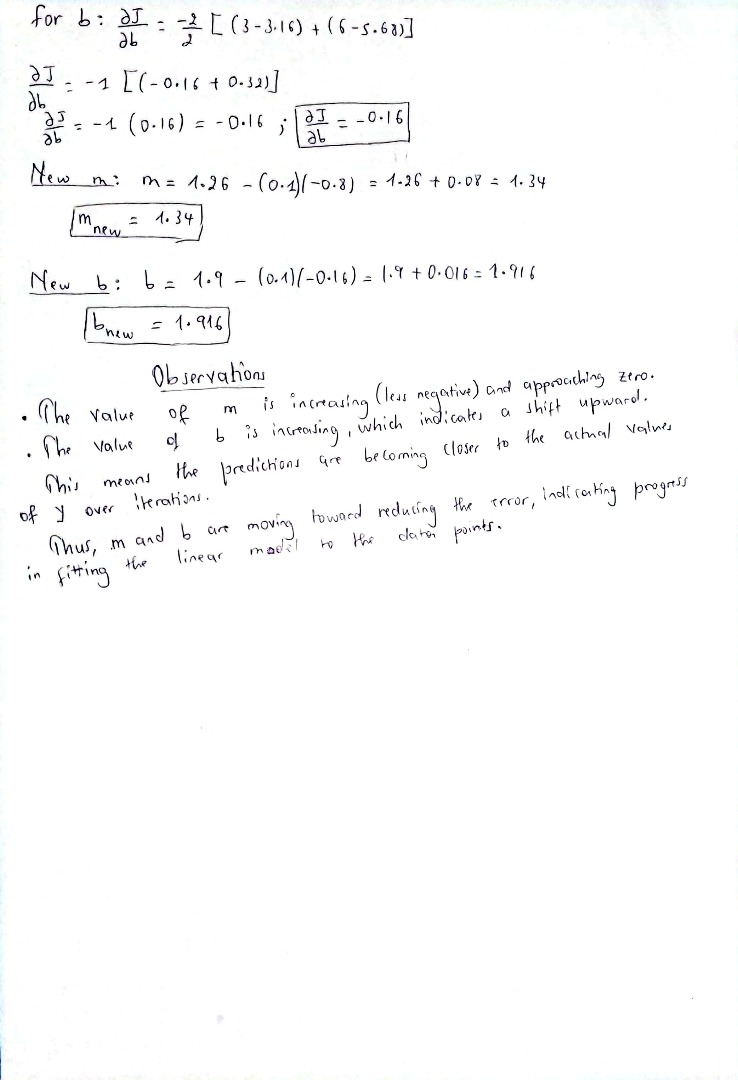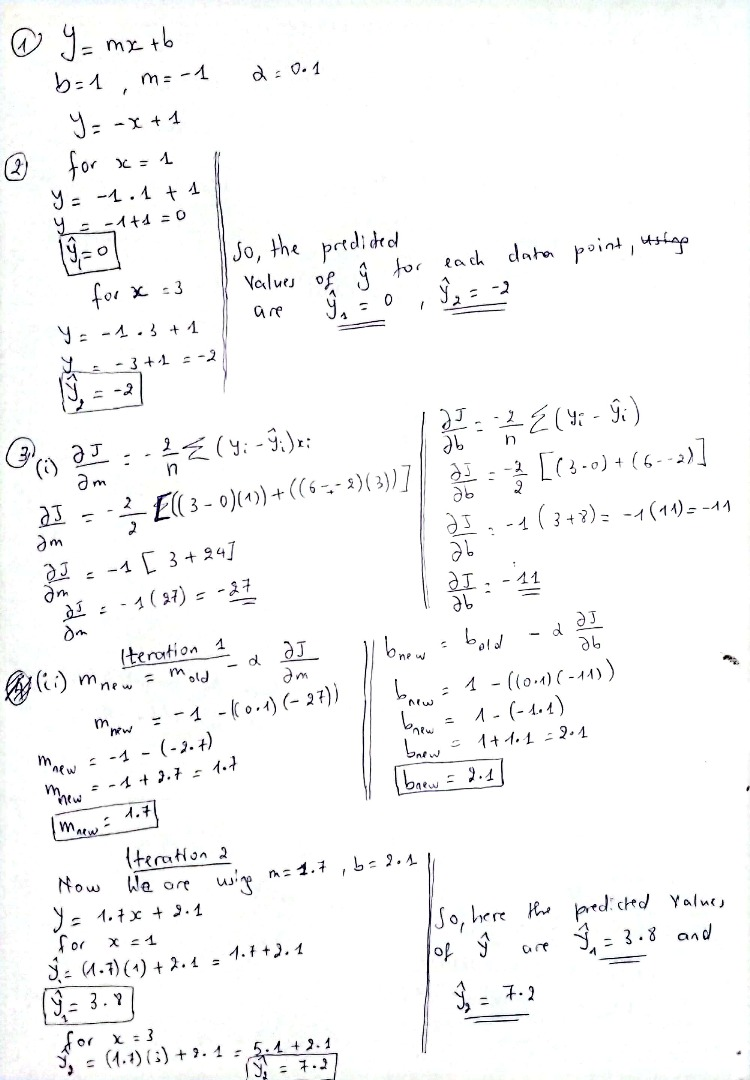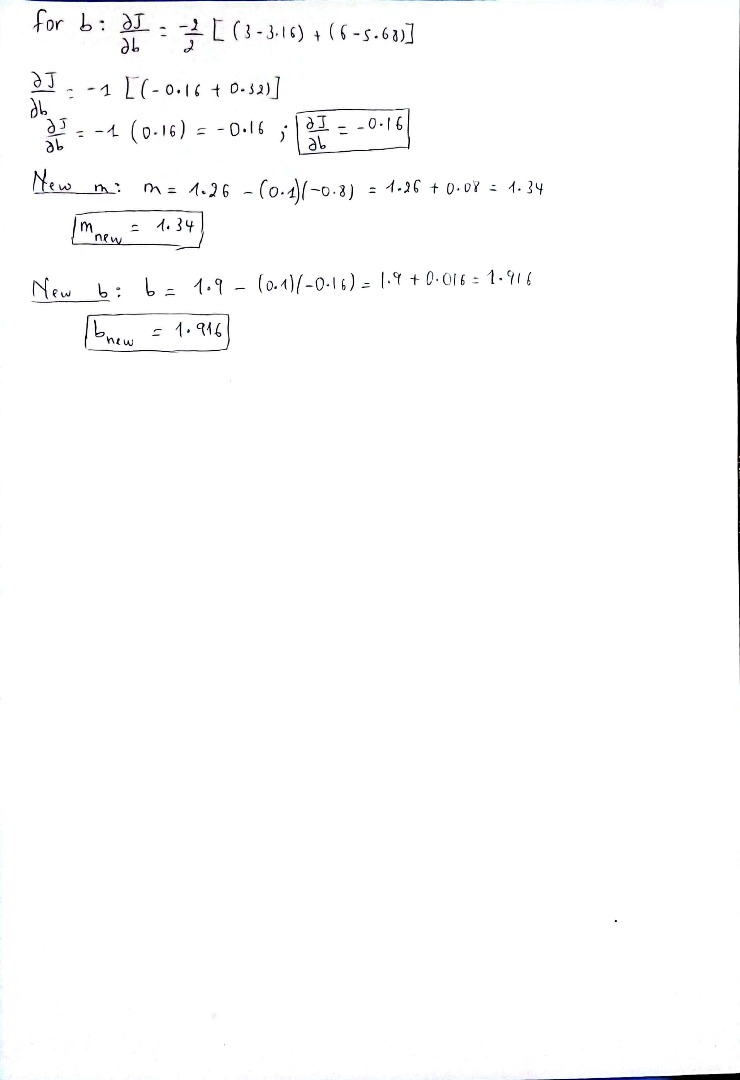

Final parameters: m = 1.5000, b = 1.5000
Predictions: [3.00000002 5.99999997]


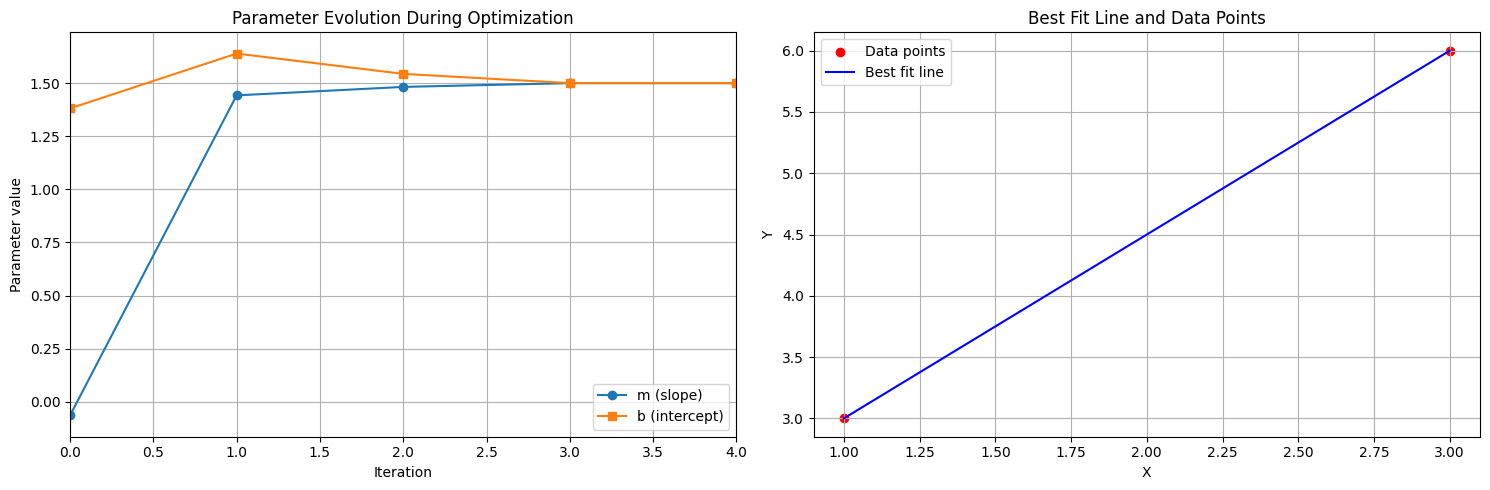

In [28]:
# Data points
x = np.array([1, 3])
y = np.array([3, 6])

# Initial parameters
m_initial = -1
b_initial = 1

# Store parameter evolution
history = {'m': [], 'b': []}

# Define loss function (Mean Squared Error)
def loss(params):
    m, b = params
    y_pred = m * x + b
    return np.sum((y_pred - y)**2)

# Callback function to track parameters
def track_params(params):
    history['m'].append(params[0])
    history['b'].append(params[1])

# Optimization
result = minimize(loss,
                 x0=[m_initial, b_initial],
                 method='BFGS',
                 callback=track_params,
                 tol=1e-6) # Stopping condition: gradient tolerance
# Final parameters
m_final, b_final = result.x
print(f"Final parameters: m = {m_final:.4f}, b = {b_final:.4f}")

# Compute predictions
predictions = m_final * x + b_final
print(f"Predictions: {predictions}")


# Visualization (side by side)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Create 1 row and 2 columns of subplots

#Parameter Evolution Plot (First subplot)
axes[0].plot(history['m'], label='m (slope)', marker='o')
axes[0].plot(history['b'], label='b (intercept)', marker='s')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Parameter value')
axes[0].set_title('Parameter Evolution During Optimization')
axes[0].legend()
axes[0].grid(True)

# Adjusting x and y limits to touch the boundaries (ensure data starts at graph's edge)
axes[0].set_xlim(left=0, right=len(history['m'])-1)  # Set x limits based on number of iterations
axes[0].set_ylim(bottom=min(min(history['m']), min(history['b'])) - 0.1,
                 top=max(max(history['m']), max(history['b'])) + 0.1)  # Set y limits based on data range

# Best Fit Line and Data Points Plot (Second subplot)
axes[1].scatter(x, y, color='red', label='Data points')  # Plot the data points
axes[1].plot(x, predictions, color='blue', label='Best fit line')  # Plot the best-fit line
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('Best Fit Line and Data Points')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### **Insights gained**
**Insight 1: Insight into Gradient Descent**

With gradient descent, I was able to observe how the algorithm iteratively changes the parameters to minimize the loss function. With some initial values for m and b, I observed the optimization process fit these values closer and closer to the data step by step. Observing it get better step by step reinforced the importance of learning rates and how small updates result in a better model with multiple iterations.

**Insight 2: Parameter Updates & Convergence**

One of the key things that I came to know was how m and b vary from iteration to iteration. Initially, I believed values would converge that rapidly, but I realized the significance of an appropriate stopping criterion. The optimisation did not converge at a fixed number of iterations but converged as long as the difference of the gradient was very small. This introduced the trade-off between accuracy and efficiency—too many iterations cause wasteful computation, but too few cause sub-optimization.

**Insight 3: Loss Function Effect**

I gained a better understanding of how the loss function, in this case, Mean Squared Error (MSE), acts to guide parameter updates. Seeing the loss decrease as optimization progressed made me understand intuitively why MSE minimization will always result in a good fit to data. I also noticed how the initial values affected the convergence speed, making me appreciate why careful initialization is important in machine learning models.

**Insight 4: Visualization & Debugging**

Graphing the parameter evolution and the best-fit line provided a clear picture of gradient descent at work. Graphing m and b versus iterations enabled visualization of the impact of each step in the optimization algorithm. This also helped with debugging—when aberrant values appeared, I could go back and adjust initial conditions or learning rates. This project illustrated for me how visualization is one of the most important tools in understanding and optimizing machine learning models.